# Plots of sentiment and hate-speech prediction tasks on CrowdTangle dataset




##**Initial imports and data load**

### Installs and imports

In [2]:
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties

import numpy as np
import pandas as pd

### Load the `CrowdTangle` dataset
> This is the dataset over which sentiment and hate speech analyses have already been performed

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
df = pd.read_csv ('/content/drive/My Drive/CrowdTangle-NLP/CT_sentiment_hate.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (37,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [28]:
df.shape

(604703, 42)

In [6]:
df.columns

Index(['account.name', 'account.handle', 'platformId', 'Page Category',
       'Page Admin Top Country', 'Page Description', 'Page Created',
       'subscriberCount', 'Followers at Posting', 'date', 'Post Created Date',
       'Post Created Time', 'type', 'totalInteraction',
       'statistics.actual.likeCount', 'statistics.actual.commentCount',
       'statistics.actual.shareCount', 'statistics.actual.loveCount',
       'statistics.actual.wowCount', 'statistics.actual.hahaCount',
       'statistics.actual.sadCount', 'statistics.actual.angryCount',
       'statistics.actual.careCount', 'Video Share Status', 'Is Video Owner?',
       'statistics.actual.videoPostViewCount',
       'statistics.actual.videoTotalViewCount',
       'statistics.actual.videoAllCrosspostsViewCount', 'Video Length',
       'postUrl', 'message', 'expandedLinks.original',
       'expandedLinks.expanded', 'imageText', 'title', 'description',
       'brandedContentSponsor.platformId', 'brandedContentSponsor.name',
 

Drop empty strings

In [29]:
df = df.dropna(subset=['message']).reset_index(drop=True)
#df = df.reset_index()
print (len(df))

375922


### Declare labels

In [30]:
labels_ids_sentiment = {'negative sentiment': 0, 'neutral sentiment': 1, 'positive sentiment':2}


labels_ids_hate = {'non-hateful': 0, 'hateful': 1}

## **ML task 1: Sentiment analysis results**

Tip: choose colors from Matplotlib library [HERE](https://matplotlib.org/stable/gallery/color/named_colors.html).

In [31]:
print ("Total number of negative sentiment content", len(df [df['messageSentiment.score'] == 0]))
print ("Total number of neutral sentiment content within the dataset", len(df [df['messageSentiment.score'] == 1]))
print ("Total number of positive sentiment content within the dataset", len(df [df['messageSentiment.score'] == 2]))

Total number of negative sentiment content 138095
Total number of neutral sentiment content within the dataset 150645
Total number of positive sentiment content within the dataset 87182


Overall statistics of sentiment predictions

In [32]:
print ("Percentage of negative sentiment content within the dataset", len(df [df['messageSentiment.score'] == 0])*100/len(df),'%')
print ("Percentage of neutral sentiment content within the dataset", len(df [df['messageSentiment.score'] == 1])*100/len(df),'%')
print ("Percentage of positive sentiment content within the dataset", len(df [df['messageSentiment.score'] == 2])*100/len(df),'%')

Percentage of negative sentiment content within the dataset 36.73501417847319 %
Percentage of neutral sentiment content within the dataset 40.07347268848325 %
Percentage of positive sentiment content within the dataset 23.191513133043557 %


Histograms of the predicted sentiment scores

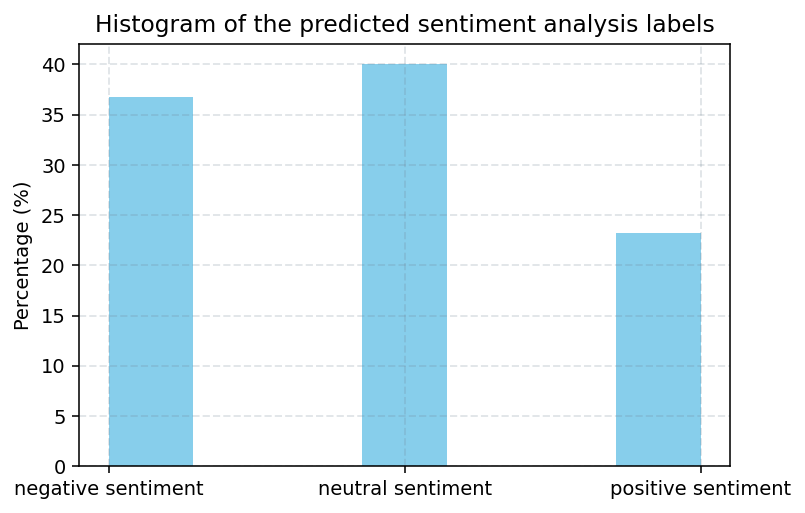

In [33]:
x = np.arange(3)
bins = np.linspace(0, 2, 8)

fig, ax = plt.subplots (figsize=(6, 4), dpi=140)
plt.title ('Histogram of the predicted sentiment analysis labels')

df['messageSentiment.score'].hist(bins=bins, weights=np.ones_like(df[df.columns[0]])*100./len(df), color = "skyblue")

ax.set_ylabel ('Percentage (%)')
#ax.set_xlabel (r'Predicted labels')
ax.set_xticks (x)
ax.set_xticklabels (list(labels_ids_sentiment.keys()))
ax.grid(color='slategrey', linestyle='--', linewidth=1, alpha=0.2)
#ax.legend (loc='upper right')
plt.show ()

Bar plot of top accounts

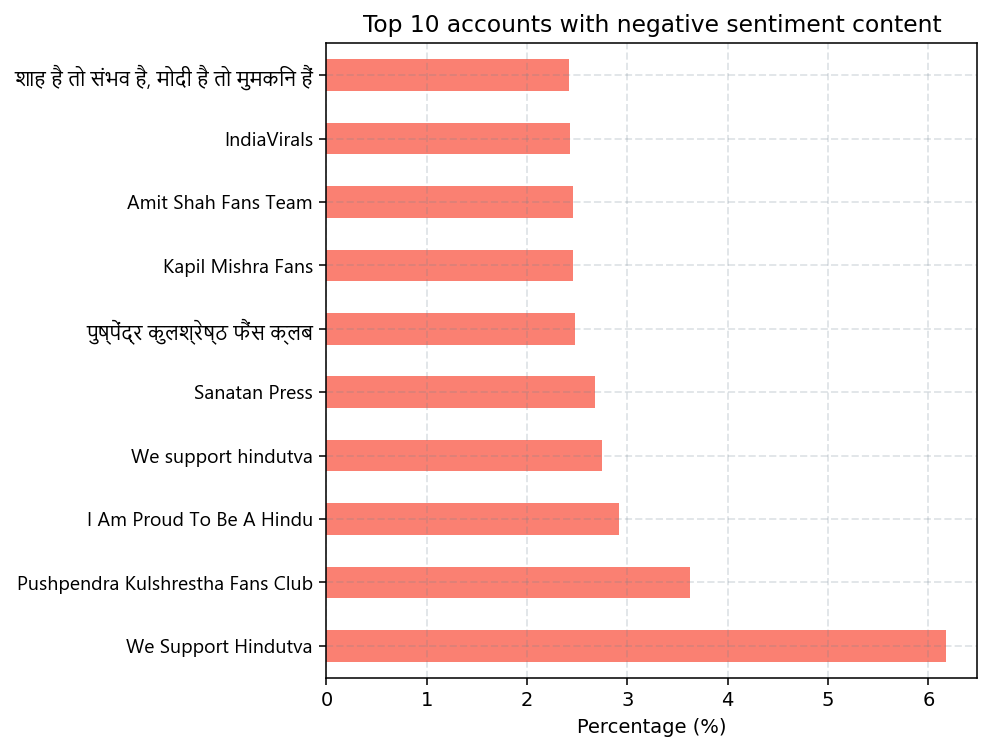

In [34]:
plt.figure(figsize=(6,6),dpi=140)

negative_sentiment = df [df['messageSentiment.score'] == 0]
negative_sentiment_percent = negative_sentiment ['account.name'].value_counts()*100/len(negative_sentiment)
negative_sentiment_percent[:10].plot(kind='barh', color = "salmon")

# Customize matplotlib
hindi_font = FontProperties(fname = '/content/drive/MyDrive/CrowdTangle-NLP/Nirmala.ttf')

plt.yticks(fontproperties=hindi_font)
plt.grid(color='slategrey', linestyle='--', linewidth=1, alpha=0.2)
plt.title('Top 10 accounts with negative sentiment content')
plt.xlabel('Percentage (%)')
#plt.xticks(rotation = 60)

plt.show()

Top page categories

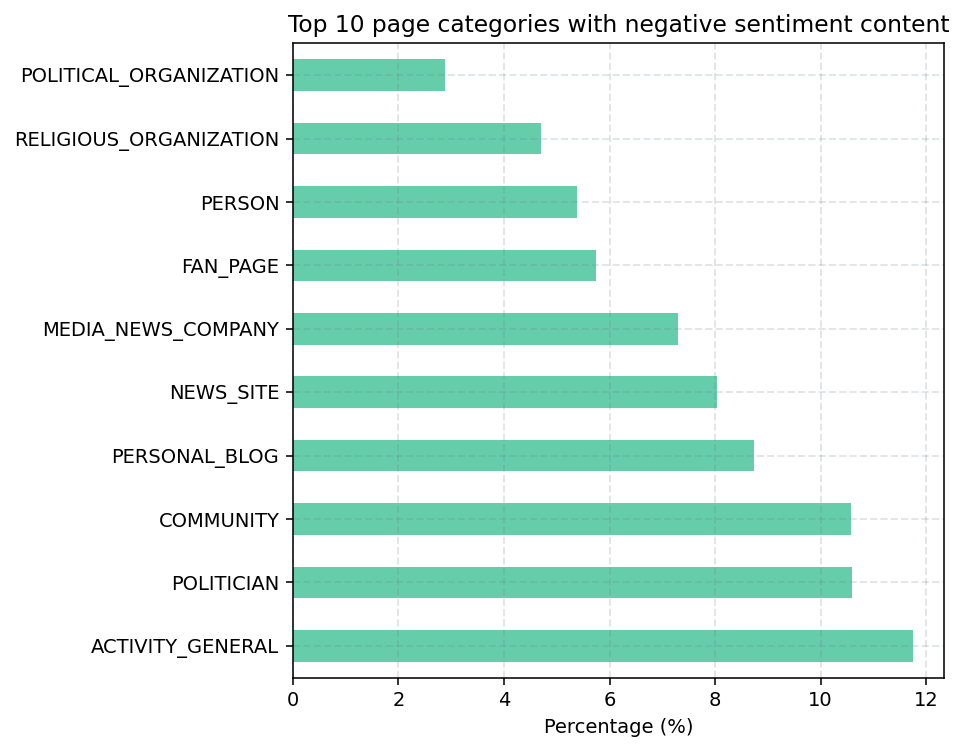

In [35]:
plt.figure(figsize=(6,6),dpi=140)


negative_sentiment_category_percent = negative_sentiment ['Page Category'].value_counts()*100/len(negative_sentiment)
negative_sentiment_category_percent[:10].plot(kind='barh', color = "mediumaquamarine")


# Customize matplotlib
#hindi_font = FontProperties(fname = '/content/drive/MyDrive/CrowdTangle-NLP/Nirmala.ttf')

#plt.xticks(fontproperties=hindi_font)
#plt.xticks(rotation = 60)

plt.title('Top 10 page categories with negative sentiment content')
plt.grid(color='slategrey', linestyle='--', linewidth=1, alpha=0.2)
plt.xlabel('Percentage (%)')
#plt.grid(True)

plt.show()

## **ML task 2: Hate speech analysis results**

Overall statistics of hate speech predictions

In [40]:
print ("Total number of non-hateful content within the dataset", len(df [df['messageHate.score'] == 0])*100/len(df),'%')
print ("Total number of hateful content within the dataset", len(df [df['messageHate.score'] == 1])*100/len(df),'%')

Total number of non-hateful content within the dataset 88.28746388878544 %
Total number of hateful content within the dataset 11.712536111214561 %


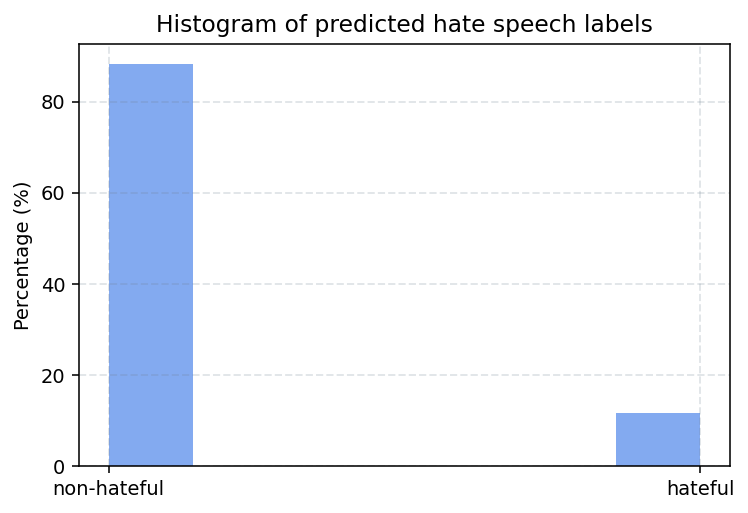

In [41]:
x = np.arange(2)
bins = np.linspace(0, 1, 8)

fig, ax = plt.subplots (figsize=(6, 4), dpi=140)
plt.title ('Histogram of predicted hate speech labels')

df['messageHate.score'].hist(bins=bins, weights=np.ones_like(df[df.columns[0]])*100./len(df), color = "cornflowerblue", alpha=0.8)

ax.set_ylabel ('Percentage (%)')
ax.set_xticks (x)
ax.set_xticklabels (list(labels_ids_hate.keys()))
ax.grid(color='slategrey', linestyle='--', linewidth=1, alpha=0.2)
#ax.legend (loc='upper right')

plt.show ()

Bar plot of top actors

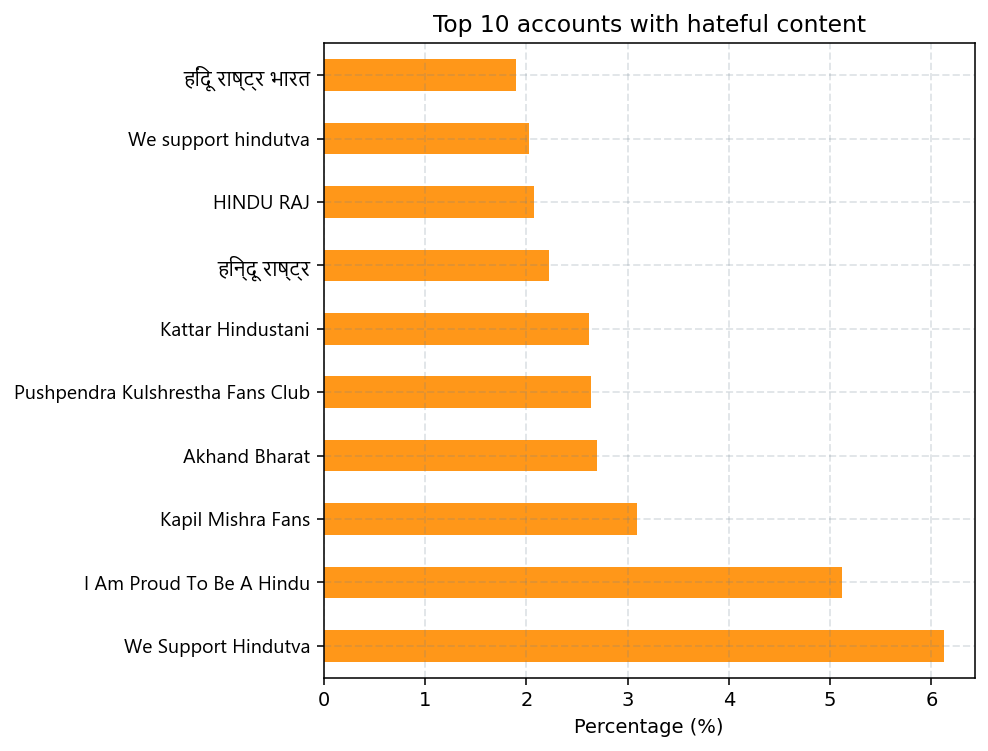

In [42]:
plt.figure(figsize=(6,6),dpi=140)

hateful_content = df [df['messageHate.score'] == 1]
hateful_content_percent = hateful_content ['account.name'].value_counts()*100/len(hateful_content)
hateful_content_percent[:10].plot(kind='barh', color='darkorange', alpha=0.9)


# Customize matplotlib
hindi_font = FontProperties(fname = '/content/drive/MyDrive/CrowdTangle-NLP/Nirmala.ttf')

plt.yticks(fontproperties=hindi_font)
#plt.xticks(rotation = 60)
plt.grid(color='slategrey', linestyle='--', linewidth=1, alpha=0.2)
plt.title('Top 10 accounts with hateful content')
plt.xlabel('Percentage (%)')
#plt.grid(True)

plt.show()

Top categories of pages

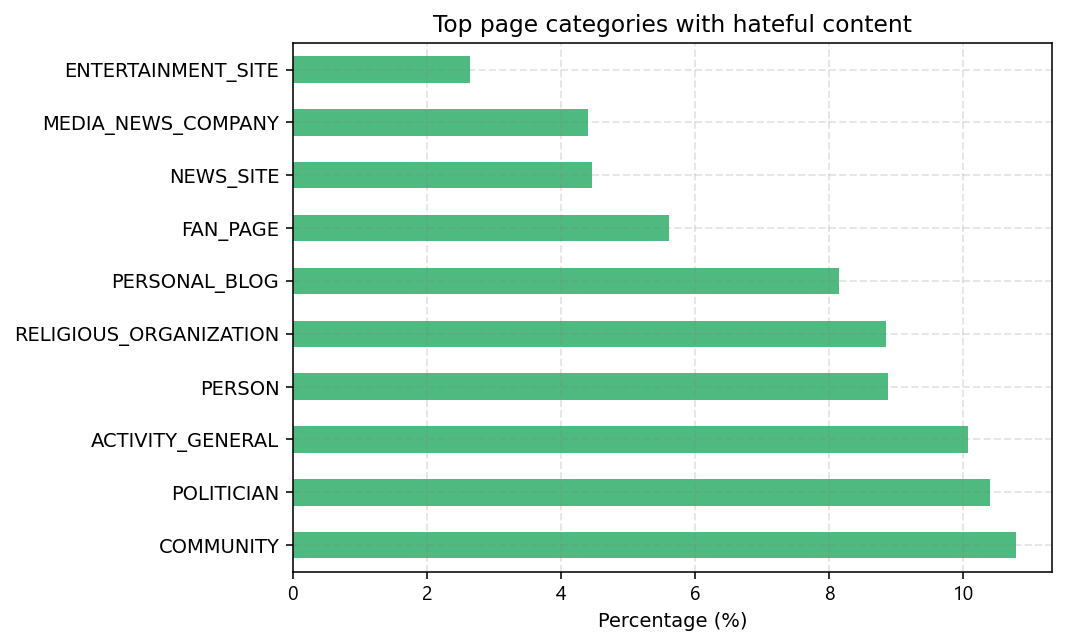

In [43]:
plt.figure(figsize=(7,5),dpi=140)

hateful_content_category_percent = hateful_content ['Page Category'].value_counts()*100/len(hateful_content)
hateful_content_category_percent[:10].plot(kind='barh', color='mediumseagreen', alpha=0.9)


# Customize matplotlib
hindi_font = FontProperties(fname = '/content/drive/MyDrive/CrowdTangle-NLP/Nirmala.ttf')

plt.xticks(fontproperties=hindi_font)
#plt.xticks(rotation = 60)
plt.grid(color='grey', linestyle='--', linewidth=1, alpha=0.2)
plt.title('Top page categories with hateful content')
plt.xlabel('Percentage (%)')
#plt.grid(True)

plt.show()

## **Data cleaning and saving**

Delete all the columns except the message text and the scores

In [44]:
df_reduced = df [['message','messageSentiment.score', 'messageHate.score']]

Save the dataframe as CSV

In [45]:
df_reduced.to_csv('/content/drive/MyDrive/CrowdTangle-NLP/scored_dataset.csv', index=False)